Modelo de Clusterização para agrupar consumidores de energia por sua similaridade

In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Carregando os dados
dados = pd.read_csv('consumo_energia.txt', delimiter = ';')

In [3]:
# Visualizando o banco de dados
dados.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
# Visualizando informações sobre o dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
# Observando o shape
dados.shape

(2075259, 9)

In [6]:
# Checando se há valores nulos
dados.isnull().values.any()

True

In [7]:
# Remove os registros com valores NA e remove as duas primeiras colunas (não são necessárias)
dados = dados.iloc[0:, 2:9].dropna()

In [8]:
# Transformando as variáveis object em numéricas
dados['Global_active_power'] = dados['Global_active_power'].astype(dtype = 'float64')
dados['Global_reactive_power'] = dados['Global_reactive_power'].astype(dtype = 'float64')
dados['Voltage'] = dados['Voltage'].astype(dtype = 'float64')
dados['Global_intensity'] = dados['Global_intensity'].astype(dtype = 'float64')
dados['Sub_metering_1'] = dados['Sub_metering_1'].astype(dtype = 'float64')
dados['Sub_metering_2'] = dados['Sub_metering_2'].astype(dtype = 'float64')


In [9]:
# Checando a quantidade de valores nulos
dados.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
# Conferindo se o dataset foi atualizado
dados.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [11]:
# Obtém os valores dos atributos. Neste caso as variaveis foram carregadas como categorias (object) entao iremos extrair os valores...
dados_atrib = dados.values

In [12]:
# Observando
dados_atrib

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]])

In [13]:
# Coleta uma amostra de 2% dos dados para não comprometer a memória do computador
amostra1, amostra2 = train_test_split(dados_atrib, train_size = .02)

In [14]:
# Observando o shape
amostra1.shape

(40985, 7)

In [15]:
# PCA Aplica redução de dimensionalidade
pca = PCA(n_components = 2).fit_transform(amostra1)

In [16]:
# Determinando um range de K
k_range = range(1,12)

In [17]:
# Aplicando o modelo K-Means para cada valor de K
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

In [18]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [19]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [20]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [21]:
# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

In [22]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

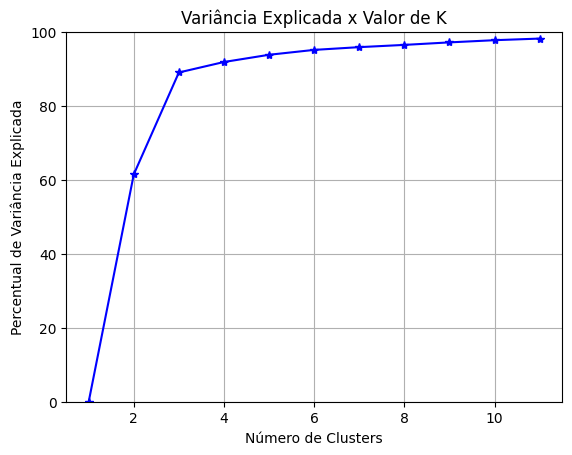

In [23]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [27]:
# Criando um modelo com K = 8 com base na curva de Elbow
modelo_v1 = KMeans(n_clusters = 8)
modelo_v1.fit(pca)

KMeans()

In [28]:
# Obtendo os valores mínimos e máximos e organizando o shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_v1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

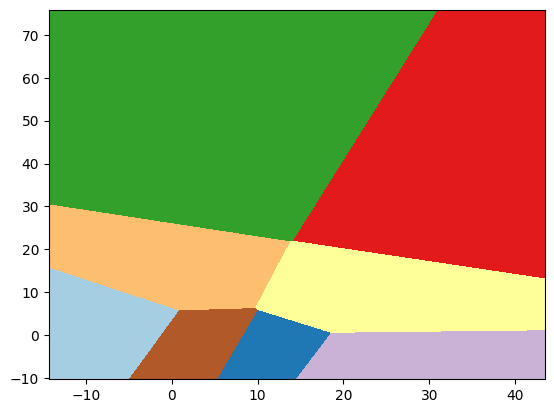

In [29]:
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z,
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto',
           origin = 'lower')

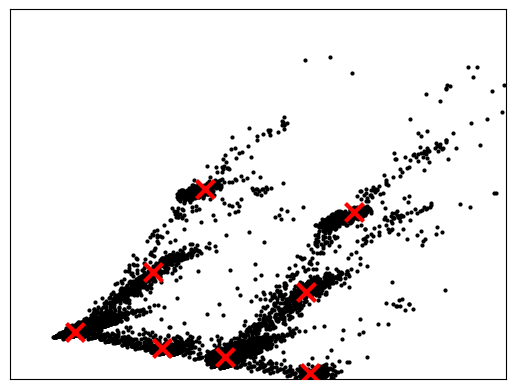

In [30]:
# Plotando dos centróides
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize = 4)
centroids = modelo_v1.cluster_centers_
inert = modelo_v1.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [31]:
# Silhouette Score utilizamos para avaliar se o número de clusters é o ideal
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.8069478589612837

In [33]:
# Lista com nomes das colunas
nomes = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [34]:
# Criando o cluster map
cluster_map = pd.DataFrame(amostra1, columns = nomes)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = modelo_v1.labels_

In [35]:
# Observando a variável
cluster_map

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,0.190,0.000,235.80,0.8,0.0,1.0,0.0,0
1,0.346,0.050,245.55,1.4,0.0,0.0,0.0,0
2,0.350,0.112,239.57,1.4,0.0,0.0,0.0,0
3,1.338,0.074,242.33,5.6,0.0,0.0,19.0,1
4,1.288,0.066,240.48,5.4,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...
40980,0.218,0.060,242.60,1.0,0.0,0.0,0.0,0
40981,1.302,0.000,238.83,5.4,0.0,0.0,19.0,1
40982,2.306,0.360,238.99,9.6,0.0,0.0,0.0,0
40983,1.762,0.056,241.13,7.2,0.0,1.0,19.0,1


In [36]:
# Calculando a média do consumo de energia por cluster
cluster_map.groupby('cluster')['Global_active_power'].mean()

cluster
0    0.511128
1    1.823394
2    3.418486
3    4.666313
4    2.588199
5    2.330116
6    3.918595
7    1.106351
Name: Global_active_power, dtype: float64